<a href="https://colab.research.google.com/github/JSJeong-me/LGE-PRI-1st/blob/main/interface-agents/interface_agents_naver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Interface Agents

Interface agents address tasks by interacting with a user interface. They can be used to build systems that address tasks that are not easily accessible through an API.  


This notebook demonstrates how the `InterfaceAgent` package to address entire tasks by interacting with a user interface. The package is built on top of the `Playwright` library, which provides a high-level API to interact with web pages.





In [ ]:
!pip install interfaceagent openai==1.54.0 httpx==0.27.2

In [ ]:
!playwright install

In [7]:
from google.colab import userdata
import openai
import os

openai.api_key = userdata.get('OPENAI_API_KEY')

In [4]:
from interfaceagent import WebBrowser, Planner, OpenAIPlannerModel

In [8]:
browser = WebBrowser(start_url="http://naver.com/",headless=True) # False
model = OpenAIPlannerModel(model="gpt-4o-mini-2024-07-18")

In [9]:
task = f"""
Here is the step-by-step English prompt to execute the described task:

Navigate to the URL:
Open the website [https://www.naver.com/].

Locate the Search Bar:
Find the search bar on the Naver homepage.

Input Search Query:
Type "선유도역 현재기온" (Seonyudo Station current temperature) into the search bar.

Execute Search:
Press the search button or hit Enter to submit the query.

Extract Current Temperature:
Wait for the search results to load, locate the section displaying the current temperature, and extract the temperature as text.
"""

In [10]:
planner = Planner(model=model, web_browser=browser, task=task)

In [11]:
result = await planner.run(task=task)

2025-01-20 02:40:33.144 | INFO     | interfaceagent.interface.planner:run:254 - WebBrowser not initialized. Initializing now.
2025-01-20 02:40:35.932 | INFO     | interfaceagent.interface.webbrowser:initialize:39 - WebBrowser successfully initialized.
2025-01-20 02:40:38.096 | INFO     | interfaceagent.interface.planner:generate_plan:58 - High-level plan: ['Open the website https://www.naver.com/', 'Locate the search bar on the Naver homepage.', "Type '선유도역 현재기온' into the search bar.", 'Press the search button or hit Enter to submit the query.', 'Wait for the search results to load.', 'Locate the section displaying the current temperature.', 'Extract the temperature as text.']
2025-01-20 02:41:27.518 | INFO     | interfaceagent.interface.webbrowser:get_interactive_elements:167 - Total interactive elements found: 157
2025-01-20 02:41:30.986 | INFO     | interfaceagent.interface.planner:next_actions:106 - Next actions: [{'action': 'type', 'selector': '#query', 'selector_type': 'css_selec

In [12]:
print(result)

{'task': '\nHere is the step-by-step English prompt to execute the described task:\n\nNavigate to the URL:\nOpen the website [https://www.naver.com/].\n\nLocate the Search Bar:\nFind the search bar on the Naver homepage.\n\nInput Search Query:\nType "선유도역 현재기온" (Seonyudo Station current temperature) into the search bar.\n\nExecute Search:\nPress the search button or hit Enter to submit the query.\n\nExtract Current Temperature:\nWait for the search results to load, locate the section displaying the current temperature, and extract the temperature as text.\n', 'page_content': {'content': "메뉴 영역으로 바로가기\n본문 영역으로 바로가기\nNAVER\n한글 입력기\n자동완성 레이어\n검색\n사용자 링크\n로그인\n서비스 더보기\n블로그\n카페\n이미지\n지식iN\n인플루언서\n동영상\n쇼핑\n뉴스\n숏텐츠\n어학사전\n지도\n도서\n지식백과\n학술정보\n다음\n더보기\n공유\n선유도역 현재기온 검색 결과\n영등포구 양평동5가\n영등포구 양평동5가\n오늘\n \n내일\n \n모레\n \n월간\n \n과거\n날씨 제공사 설정\n기상청\n \n아큐웨더\n \n웨더채널\n \n웨더뉴스\n예보비교\n오늘의 날씨\n흐림\n현재 온도\n3.6°\n\n어제보다 1.7° \n낮아요\n 흐림\n\n체감 2.6° 습도 75% 남동풍 1.3m/s\n미세먼지\n나쁨\n \n초미세먼지\n매우나쁨\n \n자외선\n좋음\n \n일

## 위 json format text 에서 '3.6' 을 pasing 하는 python code 작성

In [14]:
import ast
import re

# 주어진 json-like 텍스트(문자열)를 그대로 넣습니다.
json_text = """{
  'task': '\\nHere is the step-by-step English prompt to execute the described task:\\n\\nNavigate to the URL:\\nOpen the website [https://www.naver.com/].\\n\\nLocate the Search Bar:\\nFind the search bar on the Naver homepage.\\n\\nInput Search Query:\\nType "선유도역 현재기온" (Seonyudo Station current temperature) into the search bar.\\n\\nExecute Search:\\nPress the search button or hit Enter to submit the query.\\n\\nExtract Current Temperature:\\nWait for the search results to load, locate the section displaying the current temperature, and extract the temperature as text.\\n',
  'page_content': {
    'content': "메뉴 영역으로 바로가기\\n본문 영역으로 바로가기\\nNAVER\\n...\\n현재 온도\\n3.6°\\n\\n어제보다 1.7° ...",
    'history': [
      ('type', '#query', '선유도역 현재기온'),
      ('press', '#query', 'Enter')
    ]
  },
  'page_screenshot': 'screenshot.png',
  'status': 'completed',
  'completion_reason': 'The task is complete as the current temperature for Seonyudo Station (선유도역) has been successfully extracted from the search results, which shows a temperature of 3.6°.'
}"""

# (1) ast.literal_eval 로 Python 객체로 변환
data = ast.literal_eval(json_text)

# (2) page_content -> content 부분 가져오기
content_text = data["page_content"]["content"]

# (3) 정규 표현식(Regex)으로 "현재 온도\n숫자.숫자" 형태 추출
match = re.search(r"현재 온도\s+(\d+\.\d+)", content_text)
if match:
    temperature = match.group(1)  # '3.6' 추출
    print("추출된 온도:", temperature)
else:
    print("온도를 찾을 수 없습니다.")


추출된 온도: 3.6



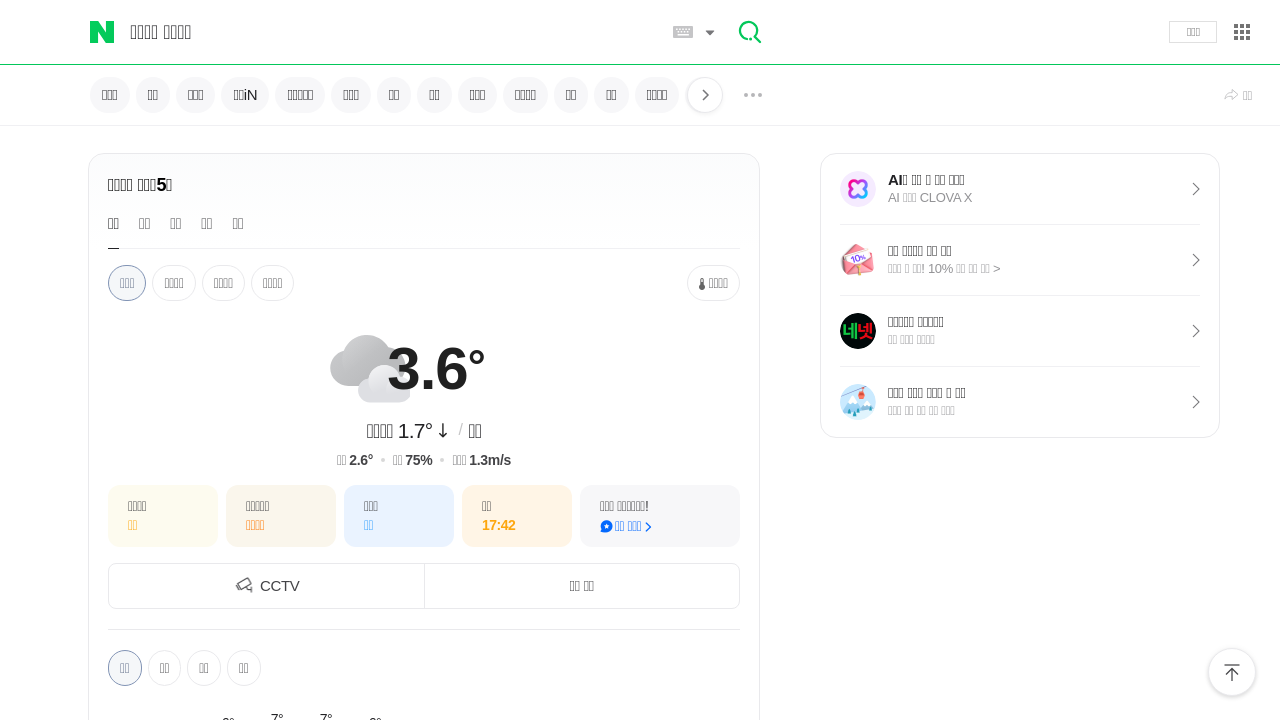

In [13]:
import base64
from IPython.display import HTML

def display_image(file_path):
    # Read the image file
    with open(file_path, "rb") as image_file:
        encoded_string = base64.b64encode(image_file.read()).decode()

    # Create the HTML to display the image
    html = f'<img src="data:image/png;base64,{encoded_string}" />'

    # Display the HTML
    return HTML(html)

# Usage
display_image('screenshot.png')

In [15]:
await browser.close()

2025-01-20 02:53:10.112 | WARNING  | interfaceagent.interface.webbrowser:close:297 - Attempting to close an uninitialized WebBrowser.
